In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df_orj=pd.read_csv("data.csv")
df=df_orj.copy()

In [4]:
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [5]:
print(df.isnull().sum().sort_values(ascending=False))
#Eksik veriler

date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115 non-null   float64
 5   total_revenue       2115 non-null   float64
 6   ad                  2115 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 115.8+ KB


In [7]:
df1=df.iloc[:,1:6]
df1.columns #Sayısal Değişkenler

Index(['shown', 'clicked', 'converted', 'avg_cost_per_click', 'total_revenue'], dtype='object')

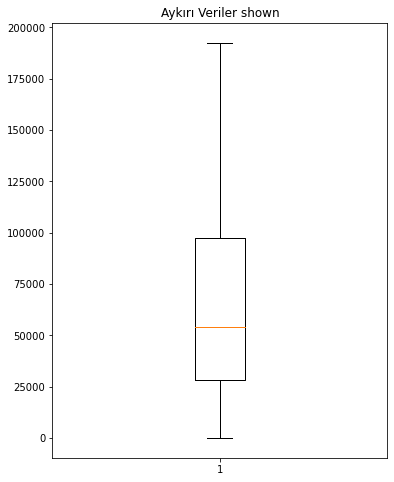

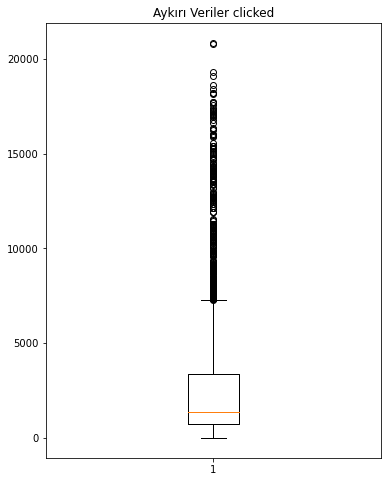

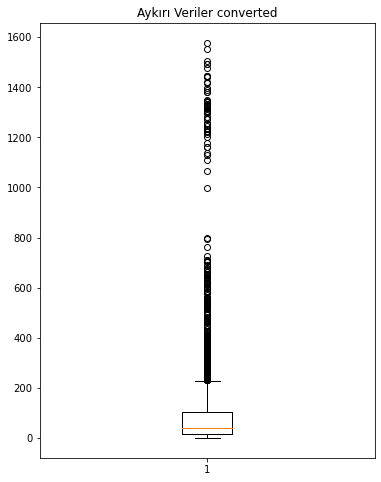

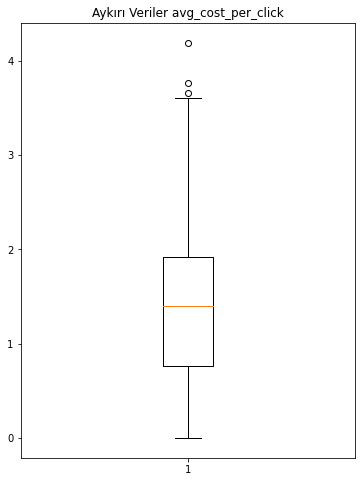

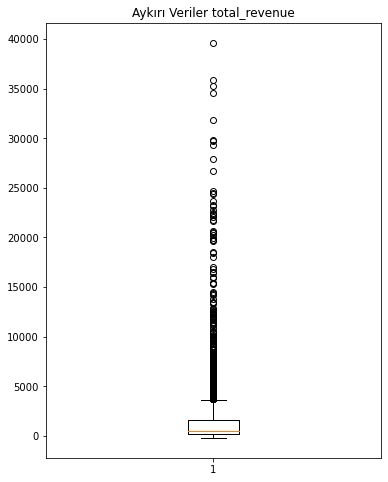

In [8]:
for i in df1.columns:
    plt.figure(i,figsize=(6,8))
    plt.title("Aykırı Veriler "+i)
    plt.boxplot(df1[i])

C:\Users\Zehra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clicked'>

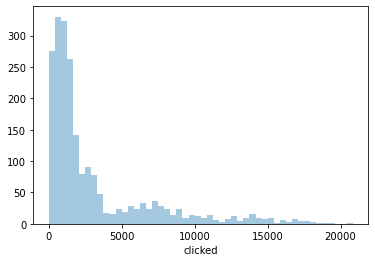

In [9]:
sns.distplot(df.clicked,kde=False)

<AxesSubplot:xlabel='converted'>

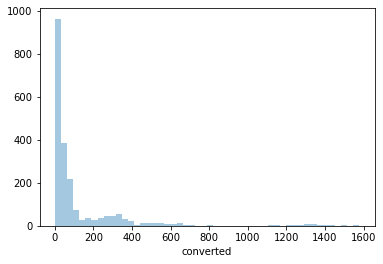

In [10]:
sns.distplot(df.converted,kde=False)

<AxesSubplot:xlabel='avg_cost_per_click'>

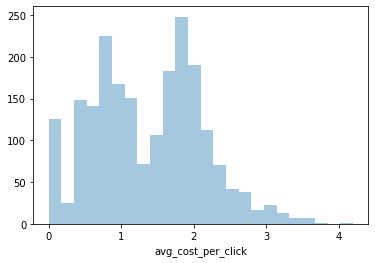

In [11]:
sns.distplot(df.avg_cost_per_click,kde=False)

<AxesSubplot:xlabel='total_revenue'>

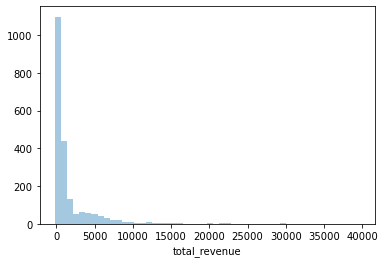

In [12]:
sns.distplot(df.total_revenue,kde=False)

In [13]:
df[["clicked","converted","avg_cost_per_click","total_revenue"]].agg(["skew", "kurtosis"]).transpose()
#çarpıklık ve basıklık
# çarpıklıkta -0.5 , 0.5 arası simetrik dağılım,
# -0.5 , -1.0 veya 0.5 , 1.0 arası orta derece çarpık
# -1  veya 1 büyükse çok çarpık dağılım
#pozitif değerler sağa yatık, negatifler sola

,skew,kurtosis
clicked,2.019864,3.713628
converted,3.586144,14.747026
avg_cost_per_click,0.244570,-0.473079
total_revenue,4.295163,23.907833


In [14]:
df["clicked"]=np.sqrt(df["clicked"])
df["converted"]=np.sqrt(df["converted"])
df["total_revenue"]=np.sqrt(df["total_revenue"])
df[["clicked","converted","total_revenue"]].agg(["skew","kurtosis"]).transpose()

C:\Users\Zehra\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,skew,kurtosis
clicked,1.158995,0.642130
converted,1.767252,3.494179
total_revenue,1.934000,4.571065


C:\Users\Zehra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clicked'>

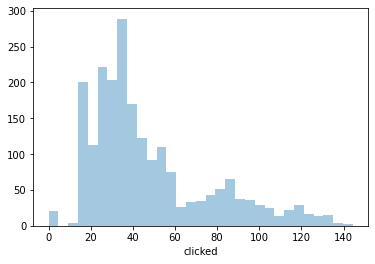

In [15]:
sns.distplot(df.clicked,kde=False)

<AxesSubplot:xlabel='converted'>

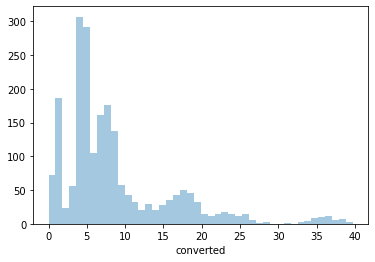

In [16]:
sns.distplot(df.converted,kde=False)

<AxesSubplot:xlabel='total_revenue'>

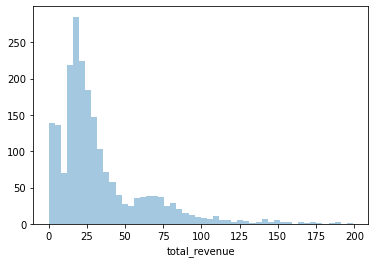

In [17]:
sns.distplot(df.total_revenue,kde=False)

##  SORU 1 : En İyi 5 Reklam Grubunu Belirleyin

In [18]:
listc=list(df["clicked"]) # Tıklanma Sayısı
lists=list(df["shown"]) # Gösterim Sayısı
len(listc),len(lists)

(2115, 2115)

In [19]:
listi=[]
for i in range(len(listc)):
    if(listc[i]!=0):
        if(lists[i]==0):# eğer tıklanma değeri var, gösterim 0'sa hata vardır o yüzden -1
            x=-1
            listi.append(x)
        else:
            c=(listc[i])/(lists[i])# hem tıklanma hem gösterim değeri varsa oranla
            #c=round(c,5)
            listi.append(c)
    else:
        if(lists[i]==0):# eğer tıklanma ve gösterim değerleri 0'sa -1
            x=-1
            listi.append(x)
        else:# eğer tıklanma değeri yok, gösterim değeri varsa başarısızlıktır o yüzden 0
            x=0
            listi.append(x)
len(listi)

2115

In [20]:
datai=pd.DataFrame(listi,columns=["intensity"]) # Tıklanma sayısı/Gösterim sayısı=İntensity

In [21]:
databirles=pd.concat([df,datai],axis=1) 
databirles.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,intensity
0,2015-10-01,65877,48.363209,6.557439,0.90,25.330219,ad_group_1,0.000734
1,2015-10-02,65100,49.979996,6.164414,0.94,27.502182,ad_group_1,0.000768
2,2015-10-03,70658,48.093659,7.000000,0.86,31.159268,ad_group_1,0.000681
3,2015-10-04,69809,53.225934,7.141428,1.01,30.122915,ad_group_1,0.000762
4,2015-10-05,68186,51.923020,6.403124,1.00,29.655522,ad_group_1,0.000761


In [22]:
data1=pd.DataFrame((df["total_revenue"]-(df["clicked"].values*df["avg_cost_per_click"])),columns=["net_revenue"])
# Tıklanma sayısı ile tıklanmaların her birinin maliyeti çarpılıp, toplam kazançtan çıkarılarak net kazanç elde edilir.

In [23]:
databirles=pd.concat([databirles,data1],axis=1)
databirles.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,intensity,net_revenue
0,2015-10-01,65877,48.363209,6.557439,0.90,25.330219,ad_group_1,0.000734,-18.196669
1,2015-10-02,65100,49.979996,6.164414,0.94,27.502182,ad_group_1,0.000768,-19.479015
2,2015-10-03,70658,48.093659,7.000000,0.86,31.159268,ad_group_1,0.000681,-10.201278
3,2015-10-04,69809,53.225934,7.141428,1.01,30.122915,ad_group_1,0.000762,-23.635278
4,2015-10-05,68186,51.923020,6.403124,1.00,29.655522,ad_group_1,0.000761,-22.267498


In [24]:
data2=databirles.iloc[:,6:8]
data2

,ad,intensity
0,ad_group_1,0.000734
1,ad_group_1,0.000768
2,ad_group_1,0.000681
3,ad_group_1,0.000762
4,ad_group_1,0.000761
...,...,...
2110,ad_group_40,0.000466
2111,ad_group_40,0.000471
2112,ad_group_40,0.000482
2113,ad_group_40,0.000496


In [25]:
datac=databirles["converted"]
data3=pd.concat([data2,datac],axis=1)
datac2=databirles["net_revenue"]
data3=pd.concat([data3,datac2],axis=1)
data3

,ad,intensity,converted,net_revenue
0,ad_group_1,0.000734,6.557439,-18.196669
1,ad_group_1,0.000768,6.164414,-19.479015
2,ad_group_1,0.000681,7.000000,-10.201278
3,ad_group_1,0.000762,7.141428,-23.635278
4,ad_group_1,0.000761,6.403124,-22.267498
...,...,...,...,...
2110,ad_group_40,0.000466,6.082763,-13.254821
2111,ad_group_40,0.000471,5.830952,-8.594720
2112,ad_group_40,0.000482,5.916080,-18.126014
2113,ad_group_40,0.000496,6.000000,-19.666718


In [43]:
data4=data3.groupby("ad").sum()
data4
# Her reklam grubunun yoğunluğu, geri dönüşü ve net kazancı toplanır.

,intensity,converted,net_revenue
ad,,,
ad_group_1,0.039731,363.400770,-1261.387415
ad_group_10,0.018038,229.233615,-1589.875799
ad_group_11,-1.911327,378.485863,-1639.766811
ad_group_12,-0.926230,649.219677,-1961.336678
ad_group_13,-1.962881,1842.905055,-3243.736311
ad_group_14,0.097727,237.569184,326.744255
ad_group_15,0.064305,216.071747,22.906614
ad_group_16,-1.952602,434.168309,828.855239
ad_group_17,0.013323,200.491740,-28.881909


### En İyi 5 Reklam Grubu

In [150]:
sıralama=[]
listad=[1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,5,6,7,8,9]
listi=list(data4["intensity"])
listc=list(data4["converted"])
listnet=list(data4["net_revenue"])
for i in range(40):
    for j in range(40-i):# Mevcut elemandan sonraki bütün elemanlarla kıyasla
        if(listnet[i]>0):# Kazanç pozitif olacak
            if(listnet[i]>listnet[i+j]):
                if(listi[i]>listi[i+j]):
                    sıralama.append(listad[i]) # Kıyaslanan elemanın kazancından ve yoğunluğundan büyükse listeye ekle
                elif(listc[i]>listc[i+j]):
                    sıralama.append(listad[i])# Kıyaslanan elemanın kazancından ve geri dönüşünden büyükse listeye ekle
            else:
                if(listi[i]>listi[i+j]):
                    if(listc[i]>listc[i+j]):
                        sıralama.append(listad[i])# Kıyaslanan elemanın yoğunluğundan ve geri dönüşünden büyükse listeye ekle

for i in range(sıralama.count(sıralama[i]),len(sıralama),sıralama.count(sıralama[i])):
    print(str(sıralama[i])+". grup = "+str(sıralama.count(sıralama[i])))
    
#Her reklam grubunun yoğunluğu(tıklanma/gösterim), geri dönüşleri, net kazançları toplandı.
#Reklam gruplarının tutulduğu listenin ilk elemanından başlandı, kendinden sonraki bütün reklam gruplarıyla kıyaslandı.
#Mevcut reklamın bu üç metrikten en az iki değeri, kendisinden sonraki reklamların değerlerinden daha iyiyse listeye eklendi.
#Reklam adının listede tekrarı varsa, diğer reklamlarla kıyasını tekrar sayısı kadar kazanmış, Yani tekrar sayısı çok olan en iyi reklamdır.

14. grup = 30
15. grup = 21
16. grup = 20
2. grup = 25
22. grup = 22
31. grup = 11


## SORU 2 : Her Reklam Grubu İçin, 15 Aralık'ta Kaç Reklam Gösterileceğini Tahmin Edin

In [105]:
ad = pd.get_dummies(df[["ad"]])
ad
# Reklam grubu değişkenleri kategorik değişken oldukları için, sayısal değişkenlere dönüştürüldü.

,ad_ad_group_1,ad_ad_group_10,ad_ad_group_11,ad_ad_group_12,ad_ad_group_13,ad_ad_group_14,ad_ad_group_15,ad_ad_group_16,ad_ad_group_17,ad_ad_group_18,...,ad_ad_group_37,ad_ad_group_38,ad_ad_group_39,ad_ad_group_4,ad_ad_group_40,ad_ad_group_5,ad_ad_group_6,ad_ad_group_7,ad_ad_group_8,ad_ad_group_9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
df['date'] = pd.to_datetime(df['date'])

df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df.head()
# Tarih gün, ay, yıl olarak ayrıldı.

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,Day,Month,Year
0,2015-10-01,65877,48.363209,6.557439,0.90,25.330219,ad_group_1,1,10,2015
1,2015-10-02,65100,49.979996,6.164414,0.94,27.502182,ad_group_1,2,10,2015
2,2015-10-03,70658,48.093659,7.000000,0.86,31.159268,ad_group_1,3,10,2015
3,2015-10-04,69809,53.225934,7.141428,1.01,30.122915,ad_group_1,4,10,2015
4,2015-10-05,68186,51.923020,6.403124,1.00,29.655522,ad_group_1,5,10,2015


In [107]:
y=df.shown.values.reshape(-1,1)
y.shape

(2115, 1)

In [108]:
date=df.iloc[:,7:10]
ad_date=pd.concat([ad,date],axis=1)
ad_date

,ad_ad_group_1,ad_ad_group_10,ad_ad_group_11,ad_ad_group_12,ad_ad_group_13,ad_ad_group_14,ad_ad_group_15,ad_ad_group_16,ad_ad_group_17,ad_ad_group_18,...,ad_ad_group_4,ad_ad_group_40,ad_ad_group_5,ad_ad_group_6,ad_ad_group_7,ad_ad_group_8,ad_ad_group_9,Day,Month,Year
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10,2015
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,10,2015
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,10,2015
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,10,2015
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,18,11,2015
2111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,19,11,2015
2112,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,20,11,2015
2113,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,21,11,2015


In [109]:
x=ad_date.values

### Her Reklam Grubu İçin Tahmin

In [110]:
# Multiple Linear Regression
regression=LinearRegression()
regression.fit(x,y)
# 1'in sırası değiştirilerek bütün reklam gruplarının tahmini görülebilir
#ikinci reklam grubunun tahmini yapıldı.
print(regression.predict(np.array([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,12,2015]])))

[[121702.12037031]]


## Soru 3 : Reklamları,avg_cost_per_click  Artanlar,Sabit Olanlar ve Düşenler Olarak Ayırın

In [111]:
gruplarday=df.iloc[:,7:8]
gruplarcost=df.iloc[:,4:5]
gruplardc=pd.concat([gruplarday,gruplarcost],axis=1)
gruplardc

,Day,avg_cost_per_click
0,1,0.90
1,2,0.94
2,3,0.86
3,4,1.01
4,5,1.00
...,...,...
2110,18,1.01
2111,19,1.00
2112,20,1.09
2113,21,1.11


In [112]:
for i in range(2115):
    gruplardc.iloc[i:i+1,0:1]=i+1
gruplardc

,Day,avg_cost_per_click
0,1,0.90
1,2,0.94
2,3,0.86
3,4,1.01
4,5,1.00
...,...,...
2110,2111,1.01
2111,2112,1.00
2112,2113,1.09
2113,2114,1.11


In [113]:
# Linear Regression
list1=[]
for i in range(0,2120,53):
    grup=gruplardc.iloc[i:i+53,:]
    y=grup.avg_cost_per_click.values.reshape(-1,1)
    x=grup.Day.values.reshape(-1,1)
    regression=LinearRegression()
    model=regression.fit(x,y)
    list1.append(model.coef_)
#Doğrusal Regresyon -> y=mx+n -> m=eğim
#Fit çizgimizin eğimi regresyon katsayısıdır
list1

[array([[0.00092646]]),
 array([[-6.45057249e-06]]),
 array([[0.00244477]]),
 array([[-0.00773182]]),
 array([[0.00145299]]),
 array([[-0.00173359]]),
 array([[-0.00256894]]),
 array([[-0.00268908]]),
 array([[4.43476859e-05]]),
 array([[0.00071118]]),
 array([[-0.00540639]]),
 array([[-0.00299145]]),
 array([[-0.00197065]]),
 array([[-0.0001274]]),
 array([[-8.14384777e-05]]),
 array([[-0.00040881]]),
 array([[0.00570473]]),
 array([[0.00180777]]),
 array([[-0.01248428]]),
 array([[-0.00722383]]),
 array([[-0.00314224]]),
 array([[0.00333172]]),
 array([[0.01718755]]),
 array([[-0.02897033]]),
 array([[0.01602887]]),
 array([[-0.01705209]]),
 array([[0.01610627]]),
 array([[-0.00383809]]),
 array([[-0.00694807]]),
 array([[-0.0100258]]),
 array([[0.01499597]]),
 array([[-0.00778262]]),
 array([[0.00802693]]),
 array([[-0.01225931]]),
 array([[0.00382277]]),
 array([[0.01008628]]),
 array([[-0.00248589]]),
 array([[0.00143525]]),
 array([[-0.00461458]]),
 array([[0.00217651]])]

In [146]:
list_azalan=[]
list_artan=[]
list_sabit=[]
for i in range(len(list1)):
    if(list1[i]<(-0.01)):# Regresyon katsayısı -0.01'den küçük olanlar azalan
        list_azalan.append(i+1)
    else:
        if(list1[i]<0.0001 and list1[i]>(-0.01)):
        # Pozitif olup virgülden sonra sıfır sayısı 3'den fazlaysa ve negatif olup -0.01'den büyükse sabit
            list_sabit.append(i+1)
        else:#  Regresyon katsayısının pozitif ve virgülden sonra max 3 sıfırı olanlara artanlar
            list_artan.append(i+1)

### avg_cost_per_click değeri sabit olan reklam grupları

In [147]:
list_sabit

[2, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 20, 21, 28, 29, 32, 37, 39]

### avg_cost_per_click değeri artan reklam grupları

In [148]:
list_artan

[1, 3, 5, 10, 17, 18, 22, 23, 25, 27, 31, 33, 35, 36, 38, 40]

### avg_cost_per_click değeri azalan reklam grupları

In [149]:
list_azalan

[19, 24, 26, 30, 34]

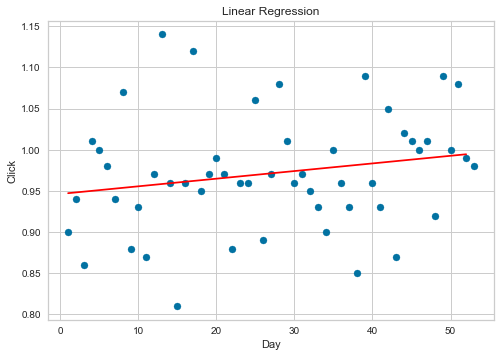

In [313]:
#İlk 53 verinin yani 1. reklam grubunun regresyonunun görselleştirilmesi
grup1=gruplardc.iloc[:53,:]
y=grup1.avg_cost_per_click.values.reshape(-1,1)
x=grup1.Day.values.reshape(-1,1)
regression=LinearRegression()
model=regression.fit(x,y)
plt.scatter(grup1.Day,grup1.avg_cost_per_click)
x=np.arange(min(grup1.Day),max(grup1.Day)).reshape(-1,1)
plt.plot(x, regression.predict(x), color = 'red')

plt.title('Linear Regression')
plt.xlabel('Day')
plt.ylabel('Click')
plt.show()